FINAL DIGHUM 150 Summer 2020

<H1><center>A gender and sensory centric analysis of the book <i> Dubliners </i> by James Joyce </center></H1>

<b><center>Delphine Veronese-Milin</b></center>



<b>Introduction </b><nl>
    
For this final project, I decided to conduct a literary analysis of the stories in James Joyce's book: Dubliners, focusing on gender, sentiment and sensory impressions. Gender is a characteristic of a writing style and can be used to understand better the author and understand bias. The author, and the male and female characterization of the text, are not simply passive elements of a text,  but shape the artifacts of the writing. 
 The main goal of this project is to arrive to a classification and definition of the 'gender' of each story, to compute the primary and secondary prevalent senses ( Auditory, Olfactory, Visual, Tactical and Taste)  and understand correlation between the dominant gender and the predominant sensory impressions. In other words, can we find a clear association between a gender and the use of a particular sense? 

In [1]:
# Import needed libraries 
import json
import requests
import spacy
import re
import string
import numpy as np
import pandas as pd
import nltk
import random
from collections import Counter
from nltk import word_tokenize
from ast import literal_eval
import matplotlib.pyplot as plt  

The book was sourced from the Gutenberg project using the corpus_db. Here we define functions to retrieve body of the book and meta data separately.  

In [2]:
#define book class 
class book:
    metadata = []
    text = []
    def __init__ (self,metadata,text):
        self.metadata=metadata
        self.text=text

#define function to retrieve book content 
def getTextAndMetaData(idlist,collection):
    for x in idlist:
        metaResponse = requests.get("http://corpus-db.org/api/id/"+x)
        textResponse = requests.get("http://corpus-db.org/api/id/"+x+"/fulltext")
        meta = json.loads(metaResponse.text)
        text = json.loads(textResponse.text)
        onebook = book(meta,text)
        collection.append(onebook)
        
ids = ["2814.0"]       
#print('No of IDS', len(ids))

mycollection = []
getTextAndMetaData(ids,mycollection)

In [3]:
# confirm we found the correct book 
for x in mycollection:
    if (x.metadata['languages']!= '[\'en\']'):
        mycollection.remove(x)
        
for x in mycollection:
    print('Book ID=', x.metadata['id'], x.metadata['title'],'+', x.metadata['author'])
    
mb_metadata= mycollection[0].metadata
mb_text= mycollection[0].text

Book ID= 2814.0 Dubliners + Joyce, James


<b> Stories Identification </b>

In order to prepare the text, I first split the corpus by the different stories (a total of 15), since each story is presented in a different setting, with a different effect on the analysis. Once we have clearly split the text, some preliminary EDA (early data analysis) is conducted. For example, when we look at the number of words in each of the stories, we can see that the stories seem to hold roughly the same amount of words, excluding the last story, The Dead. The EDA allows us to have an idea of the complexity and degree of lexical variation of these stories. Along with this, I also removed what is called the stop words, words that generally don't add any meaning to the sentence and therefore can be safely ignored. 

In [4]:
theSepar = ('THE SISTERS','AN ENCOUNTER','ARABY','EVELINE','AFTER THE RACE','TWO GALLANTS','THE BOARDING HOUSE','A LITTLE CLOUD','COUNTERPARTS','CLAY','A PAINFUL CASE','IVY DAY IN THE COMMITTEE ROOM','A MOTHER','GRACE','THE DEAD','like the descent of their last end, upon all the living and the dead.')
theTitles = ('THE SISTERS','AN ENCOUNTER','ARABY','EVELINE','AFTER THE RACE','TWO GALLANTS','THE BOARDING HOUSE','A LITTLE CLOUD','COUNTERPARTS','CLAY','A PAINFUL CASE','IVY DAY IN THE COMMITTEE ROOM','A MOTHER','GRACE','THE DEAD')

a = mb_text[0]
stra = str(a)
stories=[]
for i in range(0,len(theSepar)-1):

    #print ('Splitting between:',i, theSepar[i], 'and', theSepar[i+1])
    start = stra.find(theSepar[i]) + len(theSepar[i])
    end = stra.find(theSepar[i+1])
    substring = stra[start:end]
    stories.append(substring)
    
print ('Found', len(theTitles) , ' Stories: ' , theTitles)

Found 15  Stories:  ('THE SISTERS', 'AN ENCOUNTER', 'ARABY', 'EVELINE', 'AFTER THE RACE', 'TWO GALLANTS', 'THE BOARDING HOUSE', 'A LITTLE CLOUD', 'COUNTERPARTS', 'CLAY', 'A PAINFUL CASE', 'IVY DAY IN THE COMMITTEE ROOM', 'A MOTHER', 'GRACE', 'THE DEAD')


<b> Text preliminary literary analysis </b>

Compute literary statistics on the text (wordslength, TTR). Do this for each story of the book. We will use these quantities later to normalize against the findings. 
    
<b> Findings </b> An interesting finding is that the Type token is decreasing as the book progresses. The first stories show a degree of lexical complexity around 0.3, while the last few are around 0.2. 

In [5]:
# compute Typetoken 
def TypeToken(stringText): 
    words = nltk.word_tokenize(stringText)
    lowerWords = [w.lower() for w in words ]
    numTokens = len(lowerWords)
    numTypes = len(set(lowerWords))
    ratio = numTypes / numTokens;
    #print('the type/token ratio  is' ,ratio)
    return ratio

tta =[]
nws =[]
for x in stories:
    value = TypeToken(str(x))
    tta.append(value)
    bagofwords = word_tokenize((' '.join(x.lower().split('\\n'))).translate(str.maketrans('','',string.punctuation)))
    nws.append(len(bagofwords))
    
print('Number of words in each story: ',nws)
print('Type token of each story:',[ "%.2f" % member for member in tta])

Number of words in each story:  [3083, 3242, 2328, 1819, 2230, 3902, 2787, 4907, 4085, 2632, 3619, 5202, 4508, 7487, 15605]
Type token of each story: ['0.30', '0.33', '0.38', '0.36', '0.40', '0.31', '0.37', '0.29', '0.29', '0.32', '0.37', '0.23', '0.29', '0.24', '0.20']


<b>Genderization Analysys</b>

In order to perform the analysys, we started with a predefined set of gender typical words. Note that in english, understanding the gender of a sentence is more difficult that in other languages. In many other languages, nouns are assigned to gender largely without any semantic basis—that is, not based on any feature (such as animacy or sex) of the person or thing that a noun represents. However, in many languages there may be a correlation, to a greater or lesser degree, between gender and the form of a noun (such as the letter or syllable with which it ends).Classical Latin typically made a grammatical feminine gender in "a" (silva – forest, aqua – water) and this was reflected in feminine names originating in that period, like Emilia. Italian, for example,  preserved this characteristic. For example, Italian has approximately 93% feminine nouns with an "a" ending and 98% given names with the same ending.
In English most of the gender analysis needs to focus on the pronouns ( she, he, etc) and on particular nouns (woman, actress). 

Now that we have gender word sets, we need a method for assigning gender to a sentence; we’ll create a genderize function that examines the numbers of words from a sentence that appear in our MALE_WORDS list and in our FEMALE_WORDS list. If a sentence has only MALE_WORDS, we’ll call it a male sentence, and if it has only FEMALE_WORDS, we’ll call it a female sentence. If a sentence has nonzero counts for both male and female words, we’ll call it BOTH; and if it has zero male and zero female words, we’ll call it UNKNOWN or NONE. While this method is not 100% accurate, it provides a good approximation of author style.  It is tipically thought to have ~70% accuracy. 

The base words were sourced from pubblicly available data (2). In addition I improved the model, by addition tipycal words that were used at the time of James Joyce (Beginning of XX century). 




In [6]:
#Gender the sentences 
#Two lists  of words that are used when a man or woman is present, based on Danielle Sucher's https://github.com/DanielleSucher/Jailbreak-the-Patriarchy
male_words=set(['gentlemen','guy','spokesman','chairman',"men's",'men','him',"he's",'his','boy','boyfriend','boyfriends','boys','brother','brothers','dad','dads','dude','father','fathers','fiance','gentleman','gentlemen','god','grandfather','grandpa','grandson','groom','he','himself','husband','husbands','king','male','man','mr','nephew','nephews','priest','prince','son','sons','uncle','uncles','waiter','widower','widowers'])
female_words=set(['heroine','spokeswoman','chairwoman',"women's",'actress','women',"she's",'her','aunt','aunts','bride','daughter','daughters','female','fiancee','girl','girlfriend','girlfriends','girls','goddess','granddaughter','grandma','grandmother','herself','ladies','lady','lady','mom','moms','mother','mothers','mrs','ms','niece','nieces','priestess','princess','queens','she','sister','sisters','waitress','widow','widows','wife','wives','woman'])

#clean up 
def gender_of_a_sentence(sentence_words):
    sentence = [x.lower() for x in sentence_words]
        
    mw_length=len(male_words.intersection(sentence))
    fw_length=len(female_words.intersection(sentence))

   # if mw_length>0 and fw_length==0:
    gender = 'both'
    if (mw_length*1.2>fw_length):
        gender='male'
    if (fw_length*1.2>mw_length): 
        gender='female'
        
    if(mw_length-fw_length)==0:
        gender='both'
        
    if (mw_length==0 and fw_length==0):
        gender='none'
    return gender

def gender_c(list_of_sentences):
    
    found = False
    nowords = Counter()
    nosentences= Counter()
    
    for sent in list_of_sentences:
        gender = gender_of_a_sentence(sent)
        nosentences[gender]=nosentences[gender]+1
        nowords[gender]=nosentences[gender]+len(sent)
        
    return nosentences, nowords
        
    
def gender_parser(story):

    total_list =[]
    #gender_list=[]
   # nsents_list =[]
    sentences = [
        [word.lower() for word in nltk.word_tokenize(sentence)]
        for sentence in nltk.sent_tokenize(story)
    ]

    sents, words = gender_c(sentences)
    alls = sum(words.values())

    for gender, count in words.items():
        pcent = (count / alls) * 100
        nsents = sents[gender]

        #print("{0.3f}% {} ({} sentences)".format(pcent, gender, nsents))
        total_list.append((pcent, gender,nsents))
    return total_list
    

In [7]:

 
        
# run Genederization function 
k=0
df_colums= ['no_words','male_perc', 'female_perc', 'both_perc', 'none_perc', 'male_sent','female_sent','both_sent','none_sent', 'gender']
df = pd.DataFrame(columns=df_colums, index=theTitles[0:len(theTitles)])
#df['no_words'] = nws
allgender_list=[]
tot_list = []
for i in stories: 
    list_i = i.split(' ')
    #print(list_i)
    #print ('Genderazing ',theTitles[k])
    df['no_words'][theTitles[k]] = nws[k]
    tot_list = gender_parser(i)
    allgender_list.append(tot_list)
    #print(gender_of_a_sentence(list_i))
    df['gender'][theTitles[k]] = gender_of_a_sentence(list_i)
    for i in range(len(tot_list)):
        #print ('i',tot_list[i][1])
        if tot_list[i][1] == 'male':           
            df['male_perc'][theTitles[k]] = tot_list[i][0]
            df['male_sent'][theTitles[k]] = tot_list[i][2]
        if tot_list[i][1] == 'female': 
            df['female_perc'][theTitles[k]] = tot_list[i][0]
            df['female_sent'][theTitles[k]] = tot_list[i][2]
        if tot_list[i][1] == 'none': 
            df['none_perc'][theTitles[k]] = tot_list[i][0]
            df['none_sent'][theTitles[k]] = tot_list[i][2]
        if tot_list[i][1] == 'both': 
            df['both_perc'][theTitles[k]] = tot_list[i][0]
            df['both_sent'][theTitles[k]] = tot_list[i][2]
    
    k=k+1
    
    

#df.shape

<b> Create DataFrame </b>

Create a dataframe and compute
- the percentage of female/male/both/unknown sentences.
- the number of sentences in each story
- the prevalent gender of the story


In [8]:
df

,no_words,male_perc,female_perc,both_perc,none_perc,male_sent,female_sent,both_sent,none_sent,gender
THE SISTERS,3083,44.9275,14.4928,10.628,29.9517,69,26,4,53,male
AN ENCOUNTER,3242,45.045,9.90991,8.10811,36.9369,85,5,1,67,male
ARABY,2328,28.2353,25.098,9.80392,36.8627,21,29,5,62,male
EVELINE,1819,18.1208,44.9664,18.1208,18.7919,11,52,16,26,both
AFTER THE RACE,2230,38.9474,9.47368,12.6316,38.9474,52,1,1,72,male
TWO GALLANTS,3902,48.6842,14.4737,16.1184,20.7237,123,38,12,56,male
THE BOARDING HOUSE,2787,47.619,23.3766,13.4199,15.5844,45,44,16,28,female
A LITTLE CLOUD,4907,43.8725,8.82353,9.55882,37.7451,158,9,8,142,female
COUNTERPARTS,4085,40.5145,8.36013,9.6463,41.4791,123,9,5,91,male
CLAY,2632,23.0769,56.1873,9.699,11.0368,10,60,8,19,both


<b> Plot data by gender and by story </b>

We build a bubble graph with 3 dimensions: story, genter type and gender size. The color of each bubble represent the gender (wome=pink, men=blue, both=green, none=grey). The size of the bubble represents the weight of the gender ( ex: % of 'female' sentences in the story)

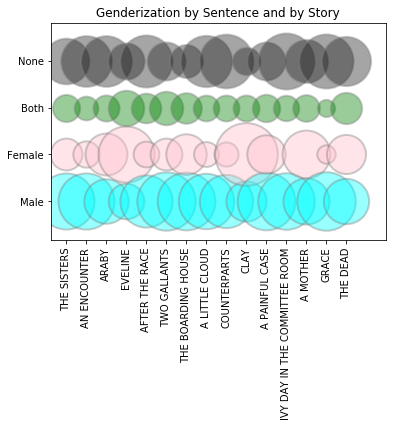

In [9]:
# Plot Genderization. By sentence/book and by story 

# create data
no_stories= len(theTitles)

k=0
x=[]
colors=[]
for i in range(no_stories):
    x.append(theTitles[i])
    x.append(theTitles[i])
    x.append(theTitles[i])
    x.append(theTitles[i])
    colors.append("#00FFFF")
    colors.append("#FFC0CB")
    colors.append("#008000")
    colors.append("#202020")  
y = ["Male", "Female","Both", "None"]
y = no_stories*y

#z is the list which contains the % of gender
z=[]
#z = np.arange(no_stories*4) 
for i in range(no_stories):
    #print ('filling z for ',i, theTitles[i])
    z.append(df['male_perc'][theTitles[i]])
    z.append(df['female_perc'][theTitles[i]])
    z.append(df['both_perc'][theTitles[i]])
    z.append(df['none_perc'][theTitles[i]])
#print(len(z), len(x), len(y), no_stories)
#df.shape
#print(len(df))

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

for i in range(len(x)):
    
    plt.scatter(x[i], y[i],color=colors[i],s=z[i]*70,alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.title("Genderization by Sentence and by Story")
plt.xticks(rotation=90) 
 
plt.show()

<b> Observations </b> Both genders are present in all the stories, altought there is a great prevalence of 'male' oriented sentences. The % of men sentences remains constant, while only a few stories (Eveline, Clay, A mother) have a clear female gender identification. There are still a good percebtage of sentences that do not have a specific gender (gender=None). It must be noted that there could be a dependecy of the choice of the vocabulary used for the classification, although it is being reported that this approach is 70-80% correct. (3) 

<b>Sensory Analysis </b>

In this second part, we perform a sensory classification of the text. James Joyce's style shifts between senses to trigger emotions  in the reader. We analyzied each story and each sense to find the predominant sense used to convey the message of the book. The analysis is based on  vocabulary such as auditory, olfactory, visual, tactical and taste. 


In [13]:
# build a database of sensory words. 

visualstring = "Bleary blurred brilliant colourless dazzling dim dingy faded faint flashy gaudy glance gleaming glimpse glistening glittering gloomy glossy glowing grimy hazy indistinct misty peer radiant shadowy shimmering shiny smudged sparkling streaked striped tarnished twinkling gazed peaceful gazed glanced twitching blind sombre feeble shadowy dark gleamed gloomy shining illumined serene bright gaunt coloured gaunt gleaming pale shrivelled dull murky glimmering"
visual=visualstring.split(" ")
#print('Visual words vocabulary:', len(visual))

audistring = "Hanging Barking Bawling Blaring Booming Buzzing Chattering Chiming Chirping Clanging Clicking Clinking Cooing Coughing crackling croaking crunching crying dripping exploding fizzing gagging gasping giggling grating grunting gurgling hissing honking jangling laughing moaning mooing mumbling muttering noisy peeping piercing pinging plopping quacking quiet rapping rasping riming ringing rumbling rustling scratching screaming screeching singing slamming shouting silent snoring splashing squawking stuttering tearing tinkling thudding thumping ticking teetering warbling wheezing whimpering whining whispering whooping murmuring silence tapping mumbling muttering whispering silent speak monotonous pleading hallooed echoed dripping tone clacking crunching whistle clanged cried shouted hum melody snorting volubly resonant loudly clapping noiselessly quiet knocking conversing blowing rakish rang scuffling snuffled stamping fussing shuffling high-pitched conversing rattling puffing choking sobbing"
audistring = audistring.lower()
audi=audistring.split(" ")
#print('Auditory words vocabulary:',len(audi))

touchstring ="Abrasive Biting Boiling Bubby Bulky Bumpy Burning Bushy Clammy Coarse Cool Cottony Crisp feathery fine fluffy foamy freezing furry fuzzy glassy gluey grainy greasy gritty gushy knobbed lacy leathery light lukewarm matted metallic moist mushy rumbling oily piercing plastic sandy scalding scorching scratchy scummy shaggy sharp silky slimy slippery sloppy smooth smothering spongy steamy steely sticky stifled stinging stony stubby tangled tender tepid thick tickling cushioned damp downy drenched hairy heavy hot humid pocked pointed pulpy rocky soapy soft sopping soupy tough velvety warm waxy warm chill damp rusty dusty cold hot oily moist fragile wet swarthy"
touch=touchstring.split(" ")
#print('Touch words vocabulary:',len(touch))

tastestring = "appetising bitter bland creamy delectable delicious flavourful flavourless gingery luscious nauseating palatable peppery piquant refreshing ripe rotten salty savoury scrumptious sharp sour spicy spoiled stale sugary sweet tangy tasteless tasty unappetising unripe vinegar yummy zesty exquisite palate"
taste=tastestring.split(" ")
#print('Taste words vocabulary:',len(taste))

smellstring = "smell nose sniff acrid aroma aromatic fetid foul-smelling fragrant moody musty nidorous odiferous odour odourless old perfumed pungent putrid rancid rank reeking scent scented smell spicy steno sweet waft whiff woolly smell musty scented fragrance perfumed"
smell=smellstring.split(" ")
#print('Smell words vocabulary:',len(smell))


<b> Lemma construction </b>

We focus the analysis on lemmas of the story instead of words because this gives us a better pattern matching. We will use lemmas on the Sensory classification. Lemmatization, unlike stemming, reduces the inflected words properly ensuring that the root word belongs to the language. To improve the algorithm I also used POS. It may not be possible manually provide the current POS tag for every word for large texts. So, instead, we will find out the correct POS tag for each word, map it to the right input character that the WordnetLemmatizer accepts and pass it as the second argument to lemmatize(). In nltk, it is available through the nltk.pos_tag() method.(4)

In [17]:
# Lemmalization of the book and the stories 

from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def lemma(word_list):
    lemma_wl =[]
    lemmatizer = WordNetLemmatizer()
    for item in word_list:
        lemma_wl.append(lemmatizer.lemmatize(item,get_wordnet_pos(item)))
    return lemma_wl
        
    
  
lemmatizer = WordNetLemmatizer() 
visual = lemma(visual)
audi = lemma(audi)
touch = lemma(touch)
taste = lemma(taste)
smell = lemma(smell)

separetor =' '
for story in stories:
    story = separetor.join(lemma(story.split()))




[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/silviaveronese/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/silviaveronese/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<b> Primary and Secondary Sense </b> 

Once we find the % of sense in each sentence, we order the tuple and we extract the primary and the secondary sense. 

In [21]:
# find Primary Sensory and Secondary Sense 

def sensory_count(sensory_list, story):

    sensory_count =0 
    for word in sensory_list:

        sensory_count +=story.count(word)
    return sensory_count

# Function to sort the list of tuples by its second item 
def Sort_Tuple(tup):  
      
    # getting length of list of tuples 
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][1] < tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    primary = tup[0]
    secondary = tup[1]
    return primary,secondary  
  
     
visual_tot=[]
audi_tot=[]
touch_tot=[]
taste_tot=[]
smell_tot=[]
k=0
sens_prim=[]
sens_secon=[]

for story in stories: 
    v=sensory_count(visual, story)/nws[k]*100
    a=sensory_count(audi, story)/nws[k]*100
    t=sensory_count(touch, story)/nws[k]*100
    ta=sensory_count(taste, story)/nws[k]*100
    sm=sensory_count(smell, story)/nws[k]*100
    sens_tuple=[]
    sens_tuple.append(("Visual",v))
    sens_tuple.append(("Touch",t)) 
    sens_tuple.append(("Auditory", a))
    sens_tuple.append(("Taste",ta))
    sens_tuple.append(("Smell",sm ))
    #print('tuple',sens_tuple)
    prim, secon= Sort_Tuple(sens_tuple)
    #print('PS',k, prim[0],secon[0])
    sens_prim.append(prim[0])
    sens_secon.append(secon[0])
    visual_tot.append(v)
    audi_tot.append(a)
    touch_tot.append(t)
    taste_tot.append(ta)
    smell_tot.append(sm)
    k=k+1
    

#print(sens_tuple)

df['visual_perc']=visual_tot
df['audi_perc']=audi_tot
df['touch_perc']=touch_tot
df['taste_perc']=taste_tot
df['smell_perc']=smell_tot
df['Primary_sensor']=sens_prim
df['Secondary_sensor']=sens_secon
#df.shape

In [22]:
df

,no_words,male_perc,female_perc,both_perc,none_perc,male_sent,female_sent,both_sent,none_sent,gender,visual_perc,audi_perc,touch_perc,taste_perc,smell_perc,Primary_sensor,Secondary_sensor
THE SISTERS,3083,44.9275,14.4928,10.628,29.9517,69,26,4,53,male,0.681155,1.362309,0.713591,0.000000,0.908206,Auditory,Smell
AN ENCOUNTER,3242,45.045,9.90991,8.10811,36.9369,85,5,1,67,male,0.524368,1.943245,0.586058,0.185071,0.555213,Auditory,Touch
ARABY,2328,28.2353,25.098,9.80392,36.8627,21,29,5,62,male,1.331615,1.890034,0.730241,0.000000,0.386598,Auditory,Visual
EVELINE,1819,18.1208,44.9664,18.1208,18.7919,11,52,16,26,both,0.439802,1.484332,0.384827,0.000000,0.879604,Auditory,Smell
AFTER THE RACE,2230,38.9474,9.47368,12.6316,38.9474,52,1,1,72,male,0.493274,1.748879,1.031390,0.089686,0.358744,Auditory,Touch
TWO GALLANTS,3902,48.6842,14.4737,16.1184,20.7237,123,38,12,56,male,0.691953,1.614557,1.153255,0.102512,0.461302,Auditory,Touch
THE BOARDING HOUSE,2787,47.619,23.3766,13.4199,15.5844,45,44,16,28,female,0.466451,1.471116,0.789379,0.035881,0.538213,Auditory,Touch
A LITTLE CLOUD,4907,43.8725,8.82353,9.55882,37.7451,158,9,8,142,female,0.631751,1.711840,0.754025,0.101895,0.774404,Auditory,Smell
COUNTERPARTS,4085,40.5145,8.36013,9.6463,41.4791,123,9,5,91,male,0.758874,2.056304,1.077111,0.146879,0.611995,Auditory,Touch
CLAY,2632,23.0769,56.1873,9.699,11.0368,10,60,8,19,both,0.341945,1.519757,0.607903,0.000000,0.607903,Auditory,Touch


<b> Plot Sensory Data </b>  

Using a radar-type chart we plot the 5 senses for each story. The reader can vizualize graphically the prevalence of each sense. 

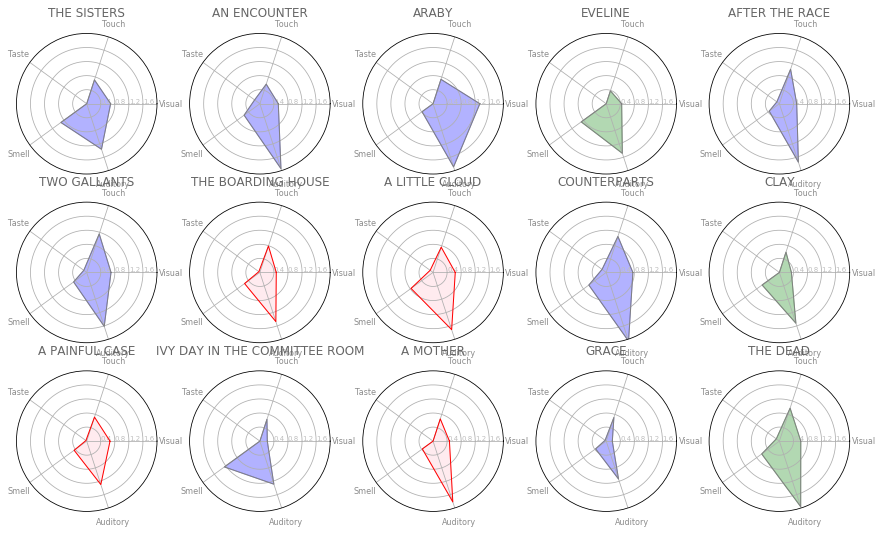

In [24]:
# plot Sensory Data 
 
colors_border=["#3C69E7","#318CE7","#FE6F5E","#0048BA","#C46210","#9F2B68","#AB274F","#3B7A57","#008000","#00FFFF","#4B5320","#A52A2A","#A1CAF1","#7C0A02","#967117"]
colors=["#5072A7","#ACE5EE","#BF4F51","#7CB9E8","#EFDECD","#E52B50" , "#F19CBB","#FFBF00","#A4C639","#7FFFD4","#D0FF14","#FF9966","#89CFF0","#DA1884","#CAE00D"]
# Libraries
from math import pi

plt.figure(figsize=(15,15))
i=1
for i in range(no_stories): 
    v = df['visual_perc'][theTitles[i]]
    t = df['touch_perc'][theTitles[i]]
    ta = df['taste_perc'][theTitles[i]]
    sm = df['smell_perc'][theTitles[i]]
    a = df['audi_perc'][theTitles[i]]

    df2 = pd.DataFrame({
    'group': ['A','B','C','D'],
    'Visual': [v, 1.5, 30, 4],
    'Touch': [t, 10, 9, 34],
    'Taste': [ta, 39, 23, 24],
    'Smell': [sm, 31, 33, 14],
    'Auditory': [a, 15, 32, 14]
    })

    # number of variable
    categories=list(df2)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df2.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #f = plt.figure(figsize=(5,5))
    #fig.tight_layout()
    ax=plt.subplot(5, 5, i+1,polar=True )

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='0.55', size=8)

    # create color
    random_number = random. randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    #print('A Random Hex Color Code is :',hex_number)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.yticks([0.4,0.8,1.2,1.6], ["0.4","0.8","1.2","1.6"], color='0.75', size=7)
    plt.ylim(0,2)
    
    #chose color 
    color_bor ='grey'
    if df['gender'][theTitles[i]] == 'female': 
        color='pink'
        color_bor='red'
    if df['gender'][theTitles[i]] == 'male': color='blue'
    if df['gender'][theTitles[i]] == 'both': color='green'
    if df['gender'][theTitles[i]] == 'none': color='grey'

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', color=color_bor)

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.3,color=color)

    #title
    plt.title(theTitles[i],pad=10, color='0.40')
    
plt.show()


<b> Observation</b> 
For all stories there is a strong focus on auditory nouns, making Auditory the primary sense used by James Joyce. This hilds true both for females and males genderized stories. Intuition would have told us otherwise. Even a story like A Mother, which is clearly female, has a strong Auditory and Olfactory vocabulary. (<i> "listening to the skirts that swept against it and to the shuffling of feet....still discomposed to the girl's bitter...", The Dead ) </i>

<b> World Cloud Analytics of key gender words and thier frequency of appearance</b>

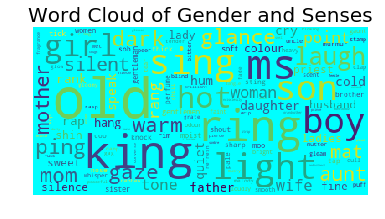

In [33]:
# Word Cloud 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

mystop_words = list(STOPWORDS) + ['he','man','men']
wcloud_text=[]
lexi = visual+touch+taste+audi+smell+list(male_words)+list(female_words)
#print (lexi)
for story in stories:
    for word in lexi:
        for i in range(story.count(word)):
            if word not in mystop_words: wcloud_text.append(word)
 
    
mytext=' '.join(wcloud_text)

wordcloud = WordCloud(stopwords = list(STOPWORDS),collocations=False,background_color="cyan").generate(mytext)


plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Gender and Senses",fontsize=20)
#plt.figure(figsize=(150,150))
plt.show()

<b> Conclusion</b> 

Most of J. Joyce stories are genderized with a prevalence towards a male gender, altought maitaining a 'female' focus in a few of those. There is a high use of sensory verbs, with Auditory becoming the primary in the stories and Touch being the secondary for most. The model has dependecies on the input vocabulary which could be enriched with further data.  No strong correlation between gender and senses is found here, indicating that Joyce's style of writing can easily moved across gender spaces with different sensory vocabulary. Besides the parsing of the data, this model can be used for any other novel and for any other type of vocabulary. 

<b> Bibliography </b>

<li> 1. Wikepedia: https://en.wikipedia.org/wiki/Grammatical_gender#Correlation_between_gender_and_the_form_of_a_noun
<li> 2. Two lists of words that are used when a man or woman is present, based on Danielle Sucher's https://github.com/DanielleSucher/Jailbreak-the-Patriarchy
<li> 3. http://nealcaren.github.io/text-as-data/html/times_gender.html
<li> 4. https://www.machinelearningplus.com/nlp/lemmatization-examples-python/